In [1]:
# k = 1
# cmath.exp(x+jy) = exp(x)(cos y + sin y j)
# exp(0) = cos 0 + j sin 0
# polar form = 1 /deg
# real component = 1*cos(deg)
# img component = 1*sin(deg)
# rectangular form = real + img j 


def exp_deg(mag,deg):
    
    rad = deg*(np.pi/180)
    real = mag*np.cos(rad)
    img = mag*np.sin(rad)

    if abs(real) < 0.00000001 :
           real = 0 

    if abs(img) < 0.00000001 :
          img = 0 

    rect = real + img*1j

    return rect

def exp_rad(mag,rad):
    real = mag*np.cos(rad)
    #print(real)
    img = mag*np.sin(rad)
    #print("img :" +str(img))
    if abs(real) < 0.00000001 :
        real = 0
      
    if abs(img) < 0.00000001 :
        img = 0
    rect = real + img*1j
    #print("final :" + str(rect))
    return rect


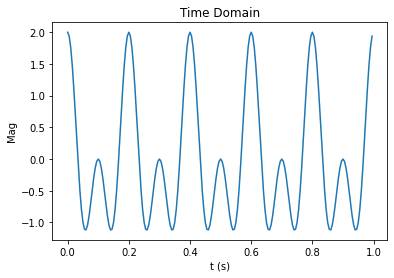

In [24]:
from scipy.fftpack import fft,ifft
import matplotlib.pyplot as plt
import numpy as np
import cmath, math

fc = 10
fc2 = 5
fs = 20*fc
t = np.arange(start=0, stop=1, step=1/fs)
x1 = np.cos(2*np.pi*fc*t)
x2 = np.cos(2*np.pi*fc2*t)
x = x1+x2

plt.plot(t,x)

plt.title("Time Domain")
plt.ylabel("Mag")
plt.xlabel("t (s)")
plt.show()

Size of Sample is 200
Size of FFT is 200


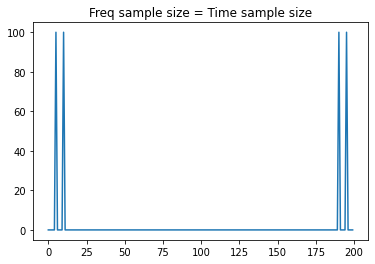

In [25]:
# FFT 

X = abs(fft(x))
t_f = np.arange(start= 0,stop=len(fft(x)))
print("Size of Sample is " + str(len(x)))
print("Size of FFT is " + str(len(X)))

plt.plot(t_f,X)
plt.title("Freq sample size = Time sample size")
plt.show()



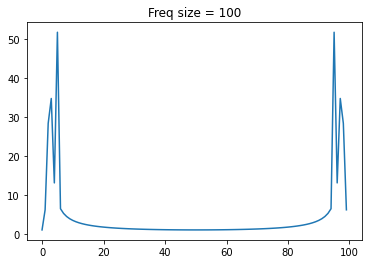

In [26]:
N = 100
X = abs(fft(x,N))
f_x = np.arange(start =0, stop = N)

plt.plot(f_x,X)
plt.title("Freq size = 100")
plt.show()

# It shows that FFT must have same or greater
# Time sample size 

[ 0.00000000e+00  3.09016994e-01  5.87785252e-01  8.09016994e-01
  9.51056516e-01  1.00000000e+00  9.51056516e-01  8.09016994e-01
  5.87785252e-01  3.09016994e-01  1.22464680e-16 -3.09016994e-01
 -5.87785252e-01 -8.09016994e-01 -9.51056516e-01 -1.00000000e+00
 -9.51056516e-01 -8.09016994e-01 -5.87785252e-01 -3.09016994e-01]
20


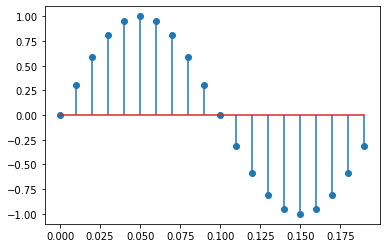

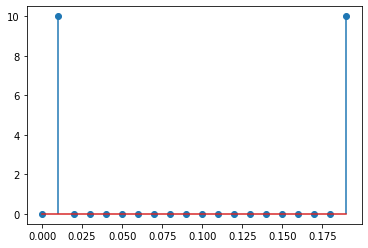

In [27]:
# Calculation of FFT  X[k] = (N-1)Sigmna(n=0) x[n]e^(-j2pikn/N)

f = 5
fs = 20*f
t = np.arange(start = 0, stop = 1, step=1/fs)
x = np.sin(2*np.pi*t*f)
X = fft(x[0:20])

print(x[0:20])
print(len(x[0:20]))

plt.stem(t[0:20],x[0:20])
plt.show()

plt.stem(t[0:20],abs(X))
plt.show()

In [28]:
def sum_exp (N_1, x, k):
    total = 0
    n = 0
    for i in x:
        total = total + i*exp_rad(1,(2*np.pi*k*n/(N_1+1))) 
        n = n+1
    #print("k is " + str(k) +" and total is " +str(abs(total))) 
    return total

def exp_list (N_1, x, k):
    total = 0 
    n = 0
    array_exp = []
    for i in range(0,N_1):
        array_exp.append(exp_rad(1,(2*np.pi*k*n/N_1+1)))
        n = n+1
    
    return array_exp

def fft_list(N_1, x, k):
    total = 0
    n= 0
    array_exp = []
    for i  in x:
        array_exp.append(i*exp_rad(1,(2*np.pi*k*n/N_1+1))) # k is simply change the frequency of the unit circle 
        n = n+1
    return array_exp

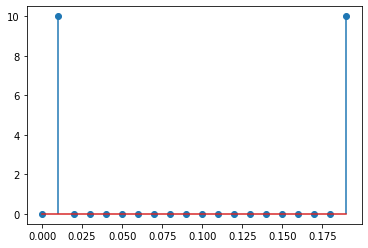

In [29]:
# Calculation of FFT  X[k] = (N-1)Sigmna(n=0) x[n]e^(-j2*pi*k*n/N)
# N = 20 
X = fft(x[0:20],20)
cal = []
for i in range(0,20):
    cal.append(abs(sum_exp (19,x[0:20],i)))    

plt.stem(t[0:20],cal)
plt.show()

[0j, (-0.0177655376693375+0.3085058970001151j), (-0.3722584299828963+0.45487928521663346j), (-0.7825209257055126+0.2053521317650764j), (-0.8861164587480878-0.34540717815821664j), (-0.5403023058681398-0.8414709848078964j), (0.05467670281398673-0.9494835203187388j), (0.5123697727714426-0.6260876241690245j), (0.5685347315791784-0.14919705694388868j), (0.28791669060340747+0.11222959540383311j), (6.616794894533517e-17+1.0305047481203613e-16j), (0.017765537669337143-0.308505897000115j), (0.37225842998289616-0.4548792852166335j), (0.7825209257055125-0.20535213176507658j), (0.8861164587480881+0.3454071781582165j), (0.54030230586814+0.8414709848078963j), (-0.054676702813986504+0.9494835203187388j), (-0.5123697727714422+0.6260876241690245j), (-0.5685347315791786+0.14919705694388885j), (-0.28791669060340763-0.1122295954038331j)]
[ 0.00000000e+00  3.09016994e-01  5.87785252e-01  8.09016994e-01
  9.51056516e-01  1.00000000e+00  9.51056516e-01  8.09016994e-01
  5.87785252e-01  3.09016994e-01  1.2246

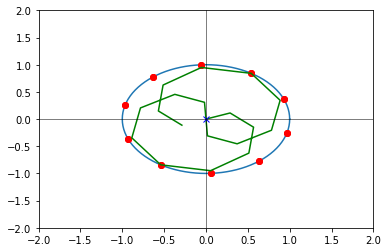

In [30]:
# Visualization of DFT algorithm 
# X[k] = (N-1)Sigmna(n=0) x[n]e^(-j2*pi*k*n/N)
# Plot the e^(-j2*pi*k*n/N) on complex plane

complex_t = exp_rad(1,(2*np.pi*1*0.5)) 
complex_array = exp_list(20,x[0:20],2)
complex_array_2 = fft_list(20,x[0:20],2)
sum_fft = np.sum(complex_array_2)
print(complex_array_2)
print(x[0:20])
#print(complex_array)
print(str(np.sum(complex_array_2)) + " Abs is " + str(abs(np.sum(complex_array_2)))) 


#plot the unit circle on the complex plane
t = np.linspace(0,2*np.pi,101)
plt.plot(np.cos(t),np.sin(t))

#plot the output of exp_rad onto the complex plane
plt.plot(np.real(complex_array),np.imag(complex_array),"ro")
plt.plot(np.real(complex_array_2),np.imag(complex_array_2),"g")
plt.plot(np.real(sum_fft),np.imag(sum_fft),'bx')

#graph settings
#plt.axes().set_aspect("equal")
plt.xlim(-2,2)
plt.ylim(-2,2)
plt.plot([0,0],[-2,2],'k',linewidth=0.5)
plt.plot([-2,2],[0,0],'k',linewidth=0.5)
plt.show()


Text(0.5, 1.0, 'Time Domain : 1Hz')

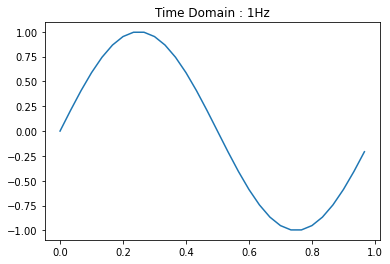

In [31]:
# This sample just create a simple 1 Hz sine wave 

f_sine = 1 # Hz
f_sine_sample = f_sine*30
t = np.arange(start = 0, stop= 1, step= 1/f_sine_sample)
x_sine = np.sin(2*np.pi*f_sine*t)

plt.plot(t,x_sine)
plt.title("Time Domain : 1Hz")


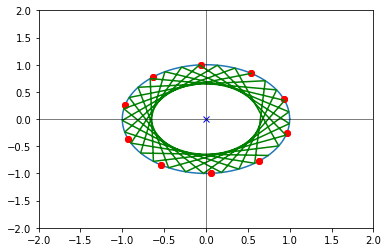

In [32]:
# FFT 
X_sine_complex_array = exp_list(29,x,8)

#plot the unit circle on the complex plane
t = np.linspace(0,2*np.pi,101)
plt.plot(np.cos(t),np.sin(t))

#plot the output of exp_rad onto the complex plane
plt.plot(np.real(complex_array),np.imag(complex_array),"ro")
plt.plot(np.real(X_sine_complex_array),np.imag(X_sine_complex_array),"g")
plt.plot(np.real(sum_fft),np.imag(sum_fft),'bx')

#graph settings
#plt.axes().set_aspect("equal")
plt.xlim(-2,2)
plt.ylim(-2,2)
plt.plot([0,0],[-2,2],'k',linewidth=0.5)
plt.plot([-2,2],[0,0],'k',linewidth=0.5)
plt.show()

In [ ]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import matplotlib.pyplot as plt, random

def list_sin(k):
    # FFT 
    X_sine_complex_array = exp_list(29,x,k)
    sum_fft = np.sum(X_sine_complex_array)
    #plot the unit circle on the complex plane
    t = np.linspace(0,2*np.pi,101)
    plt.plot(np.cos(t),np.sin(t))

    #plot the output of exp_rad onto the complex plane
    plt.plot(np.real(complex_array),np.imag(complex_array),"ro")
    plt.plot(np.real(X_sine_complex_array),np.imag(X_sine_complex_array),"g")
    plt.plot(np.real(sum_fft),np.imag(sum_fft),'bx')

    #graph settings
    #plt.axes().set_aspect("equal")
    plt.xlim(-2,2)
    plt.ylim(-2,2)
    plt.plot([0,0],[-2,2],'k',linewidth=0.5)
    plt.plot([-2,2],[0,0],'k',linewidth=0.5)
    return()

interact(list_sin, k=(0,31,1))

interactive(children=(IntSlider(value=15, description='k', max=31), Output()), _dom_classes=('widget-interact'…

<function __main__.list_sin(k)>

Conclusion : DFT is just a discrete version of Fourier Transform.

Key Concept:
1. The formula of DFT x[k] = (N-1)sigma(N=0) x[n]*e^(-j* 2*pi*k*n/N)

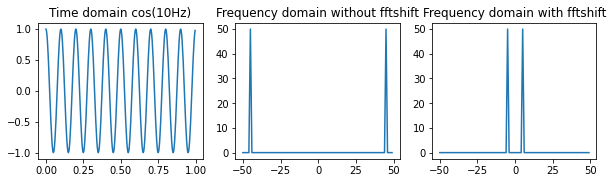

In [56]:
# FFT vs FFT shift
f_cos = 10 
f_cos_samp = 30*f_cos
t_cos = np.arange(start = 0 , stop = 1 , step = 1/f_cos_samp)
x_cos = np.cos(2*np.pi*f_cos*t_cos)

# FFT
X = fft(x)
f_cos = np.arange(start = -len(x)//2 , stop = len(x)//2, )
df = fs / (len(x))
f_cos = df*f_cos

## Apply fftshit to arange the order of the list
from scipy.fftpack import fftshift, ifftshift  
X_shift = fftshift(X)

t_f = np.arange(start= 0,stop=len(fft(x)))

fig, (ax1,ax2,ax3) = plt.subplots(nrows= 1,ncols = 3, figsize = (10,2.5))

ax1.plot(t_cos,x_cos)
ax1.set_title("Time domain cos(10Hz)")

ax2.plot(f_cos,abs(X))
ax2.set_title("Frequency domain without fftshift")

ax3.plot(f_cos,abs(X_shift))
ax3.set_title("Frequency domain with fftshift")
plt.show()



100


Text(0.5, 1.0, 'Sample size is 50')

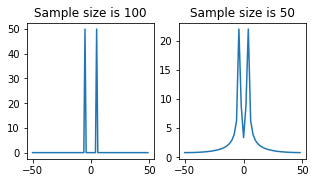

In [72]:
# The number sample for the FFT will change the 
# magnitude of the result 

# For this case we will take half of the result 
# which is 100/2  = 150 

# FFT
n = 50
print(len(X_shift))
X_2 = fft(x_cos,n)
X_2 = fftshift(X_2)

f_cos_2 = np.arange(start = -n//2, stop = n/2)
df = fs/n 

f_cos_2 = f_cos_2*df 

fig , (ax1,ax2) = plt.subplots(nrows= 1, ncols= 2, figsize = (5,2.5))

ax1.plot(f_cos,abs(X_shift))
ax1.set_title("Sample size is 100")

ax2.plot(f_cos_2,abs(X_2))
ax2.set_title("Sample size is 50")

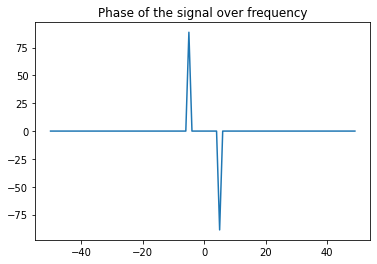

In [80]:
# Plot the phase over the frequency 

phase = (np.arctan(np.imag(X_shift), np.real(X_shift))*180/np.pi)

plt.plot(f_cos, phase)
plt.title("Phase of the signal over frequency")
plt.show()